In [589]:
import numpy as np
import pandas as pd

In [590]:
data_df=pd.read_csv('./inputs/jobs_data.csv', index_col=0)

In [591]:
#暂时没有用的列先去掉
data_df=data_df.drop(['JobDate', 'VCId','SubmitTime','AUid','random'], axis=1)

In [592]:
data_df.head()

,SLA,JobStateId,Allocation,QuotaTokens,JobPriority,YieldScopePriority_X,YieldScopePriority_Y
JobId,,,,,,,
9e1b9eda-4d37-4e9a-997c-9b6ca26583b8,NaN,2,90,10687,65,1,0
5b6c7993-b276-4783-8fef-b5489347905e,2019-04-29 23:55:00.000,2,1500,16516,20,0,0
da82bce8-9d0c-4396-9e58-d5cc9fd1947b,NaN,2,200,10687,55,1,0
8cbe19b2-ed62-41e4-9ea2-80c5d22d7634,NaN,2,250,10687,53,1,0
d0472cb3-370c-44aa-82e5-2c3ab324ffe4,NaN,2,250,10687,53,1,0


<AxesSubplot:>

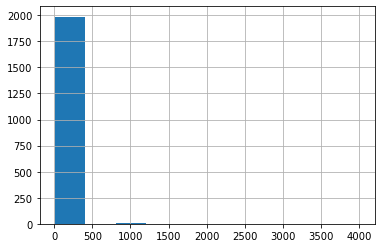

In [593]:
%matplotlib inline
priority=pd.DataFrame({"Priority":data_df["JobPriority"],"log(Priority+1)":np.log1p(data_df["JobPriority"]),"log(log(Priority+1)+1)":np.log1p(np.log1p(data_df["JobPriority"]))})
priority['Priority'].hist()


<AxesSubplot:>

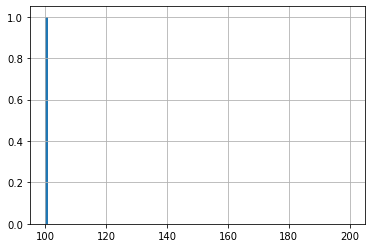

In [709]:
priority['Priority'].hist(bins=100,range=(100,200))
#priority.describe()

###  这里的Priority分布的不均匀，找找更好的平滑法

<AxesSubplot:>

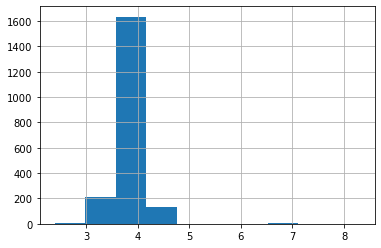

In [594]:
priority['log(Priority+1)'].hist()

<AxesSubplot:>

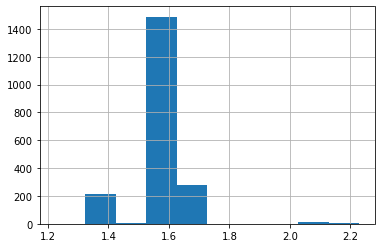

In [595]:
priority['log(log(Priority+1)+1)'].hist()
#priority.describe()

In [596]:
data_df['isExceedSLA']=0
data_df['isExceedSLA']=pd.isnull(data_df['SLA'])
data_df=data_df.drop(['SLA'],axis=1)
data_df.head()

,JobStateId,Allocation,QuotaTokens,JobPriority,YieldScopePriority_X,YieldScopePriority_Y,isExceedSLA
JobId,,,,,,,
9e1b9eda-4d37-4e9a-997c-9b6ca26583b8,2,90,10687,65,1,0,True
5b6c7993-b276-4783-8fef-b5489347905e,2,1500,16516,20,0,0,False
da82bce8-9d0c-4396-9e58-d5cc9fd1947b,2,200,10687,55,1,0,True
8cbe19b2-ed62-41e4-9ea2-80c5d22d7634,2,250,10687,53,1,0,True
d0472cb3-370c-44aa-82e5-2c3ab324ffe4,2,250,10687,53,1,0,True


In [597]:
train_df,test_df = np.split(data_df.sample(frac=1), [int(.5*len(data_df))])

In [598]:
y_train = train_df.pop('JobPriority')
y_train_db = np.log1p(y_train)
y_test = test_df.pop('JobPriority')
y_test_db=np.log1p(y_test)
#y_all = pd.concat((y_train,y_test), axis=0)
#y_validate = np.log1p(validate_df.pop('JobPriority'))

## 训练集，测试集
train_df test_df,

y_train y_test 

In [599]:
all_df = pd.concat((train_df, test_df), axis=0)

In [600]:
#y_train.shape

## 变量转换

In [601]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3f32df38-ee11-428c-89a0-ea268184dca9 to 0cdd4720-4ad4-4dc8-9b21-8f5f7ca541a3
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   JobStateId            2000 non-null   int64
 1   Allocation            2000 non-null   int64
 2   QuotaTokens           2000 non-null   int64
 3   YieldScopePriority_X  2000 non-null   int64
 4   YieldScopePriority_Y  2000 non-null   int64
 5   isExceedSLA           2000 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 95.7+ KB


In [602]:
all_df[['JobStateId','YieldScopePriority_X','YieldScopePriority_Y','isExceedSLA']] = all_df[['JobStateId','YieldScopePriority_X','YieldScopePriority_Y','isExceedSLA']].astype(str)

In [603]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3f32df38-ee11-428c-89a0-ea268184dca9 to 0cdd4720-4ad4-4dc8-9b21-8f5f7ca541a3
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   JobStateId            2000 non-null   object
 1   Allocation            2000 non-null   int64 
 2   QuotaTokens           2000 non-null   int64 
 3   YieldScopePriority_X  2000 non-null   object
 4   YieldScopePriority_Y  2000 non-null   object
 5   isExceedSLA           2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 109.4+ KB


In [604]:
all_df[['isExceedSLA']].value_counts()

isExceedSLA
True           1147
False           853
dtype: int64

In [605]:
all_df[['JobStateId']].value_counts()

JobStateId
2             1957
3               32
4               11
dtype: int64

这里的数据不是特别好，job state只有三种

In [606]:
all_df[['YieldScopePriority_X']].value_counts()

YieldScopePriority_X
1                       1539
0                        389
2                         72
dtype: int64

In [607]:
all_df[['YieldScopePriority_Y']].value_counts()

YieldScopePriority_Y
0                       1747
10                       178
1                         74
5                          1
dtype: int64

pd.get_dummies(all_df['JobStateId'], prefix='JobStateId').head()

In [608]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,Allocation,QuotaTokens,JobStateId_2,JobStateId_3,JobStateId_4,YieldScopePriority_X_0,YieldScopePriority_X_1,YieldScopePriority_X_2,YieldScopePriority_Y_0,YieldScopePriority_Y_1,YieldScopePriority_Y_10,YieldScopePriority_Y_5,isExceedSLA_False,isExceedSLA_True
JobId,,,,,,,,,,,,,,
3f32df38-ee11-428c-89a0-ea268184dca9,120,10687,1,0,0,0,1,0,1,0,0,0,0,1
a0a370a4-a990-4d55-b767-cd5a24b842f2,1500,16516,1,0,0,1,0,0,1,0,0,0,1,0
a87537d9-e5e6-4629-b7d9-31e7dbccde37,50,10687,1,0,0,0,1,0,1,0,0,0,0,1
5e682796-4920-440c-a7cf-5dc2f52a64e1,5000,16516,1,0,0,1,0,0,1,0,0,0,1,0
85b469f5-c0bc-4385-9b01-acf501d8b052,250,10687,1,0,0,0,1,0,1,0,0,0,0,1


In [609]:
all_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3f32df38-ee11-428c-89a0-ea268184dca9 to 0cdd4720-4ad4-4dc8-9b21-8f5f7ca541a3
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Allocation               2000 non-null   int64
 1   QuotaTokens              2000 non-null   int64
 2   JobStateId_2             2000 non-null   uint8
 3   JobStateId_3             2000 non-null   uint8
 4   JobStateId_4             2000 non-null   uint8
 5   YieldScopePriority_X_0   2000 non-null   uint8
 6   YieldScopePriority_X_1   2000 non-null   uint8
 7   YieldScopePriority_X_2   2000 non-null   uint8
 8   YieldScopePriority_Y_0   2000 non-null   uint8
 9   YieldScopePriority_Y_1   2000 non-null   uint8
 10  YieldScopePriority_Y_10  2000 non-null   uint8
 11  YieldScopePriority_Y_5   2000 non-null   uint8
 12  isExceedSLA_False        2000 non-null   uint8
 13  isExceedSLA_True         2000 non-null   uint8

## 标准化numerical数据

In [610]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']

In [611]:
numeric_cols

Index(['Allocation', 'QuotaTokens'], dtype='object')

计算标准分布：(X-X')/s

对所有numerical的数据作z-score平滑

In [612]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

# 建模

In [613]:
dummy_train_df = all_dummy_df.loc[train_df.index]
#dummy_validate_df=all_dummy_df.loc[validate_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [614]:
dummy_train_df.shape, dummy_test_df.shape
#dummy_validate_df.shape,

((1000, 14), (1000, 14))

In [615]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [616]:
from sklearn import linear_model

## Linear Regression

In [617]:
clf1=linear_model.LinearRegression()
test_score = np.sqrt(-cross_val_score(clf1, X_train, y_train_db, cv=10, scoring='neg_mean_squared_error'))
SqrtMSE = np.mean(test_score)
SqrtMSE

0.2586976000092792

## Lasso Regression

In [618]:
alphas = np.logspace(-3, 2, 50)
# 1e-3到1e2之间有50个数
test_scores = []
for alpha in alphas:
    clf2 = linear_model.Lasso(alpha)
    #均方根
    test_score = np.sqrt(-cross_val_score(clf2, X_train, y_train_db, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0, 0.5, 'MSE')

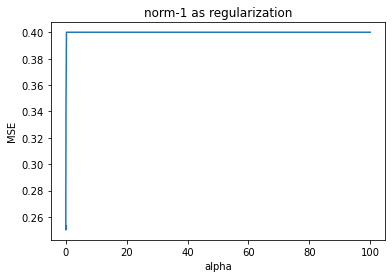

In [619]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("norm-1 as regularization");
plt.xlabel("alpha")
plt.ylabel("MSE")

## Ridge Regression


In [620]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

In [621]:
alphas = np.logspace(-3, 2, 50)
# 1e-3到1e2之间有50个数
test_scores = []
for alpha in alphas:
    clf3 = linear_model.Ridge(alpha)
    #clf是ridge类型
    test_score = np.sqrt(-cross_val_score(clf3, X_train, y_train_db, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0, 0.5, 'MSE')

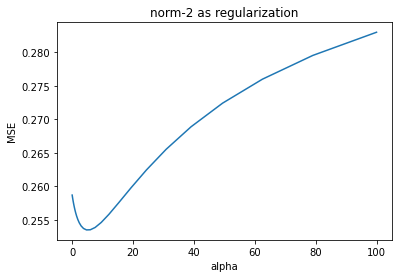

In [622]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("norm-2 as regularization");
plt.xlabel("alpha")
plt.ylabel("MSE")

alpha 大约等于4的时候结果比较好

In [664]:
clf3 = linear_model.Ridge(alpha=4)
clf3.fit(X_test, y_test_db)
pre = clf3.predict(X_test)

In [665]:
from sklearn.metrics import mean_squared_error
pre=clf3.predict(X_test)
np.sqrt(mean_squared_error(pre,y_test_db)),np.mean(y_test_db)

(0.3063489540649935, 3.9169815462130737)

## Random Forest

In [623]:
from sklearn.ensemble import RandomForestRegressor

#### 对n_estimators进行调优

In [624]:
n_estimators = range(1,401,20)
test_scores = []
for n_estimator in n_estimators:
    clf = RandomForestRegressor(n_estimators=n_estimator, max_features=.3, random_state=10)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train_db, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

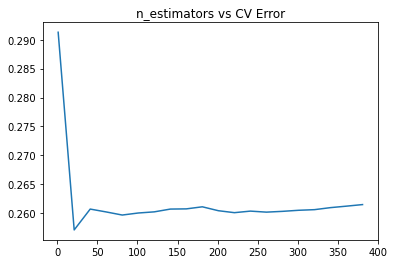

In [625]:
plt.plot(n_estimators, test_scores)
plt.title("n_estimators vs CV Error");

#### 对max_features进行调优

In [643]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=220, max_features=max_feat, random_state=15)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train_db, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

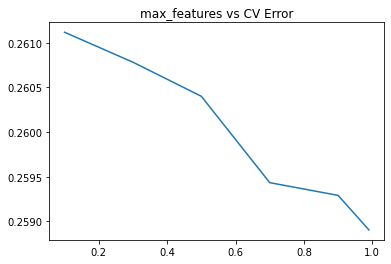

In [683]:
plt.plot(max_features, test_scores)
plt.title("max_features vs CV Error");

### max_features=0.9,  n_estimators=220 的RF比较好

In [666]:
clf = RandomForestRegressor(n_estimators=220, max_features=.99, oob_score=True, random_state=20)
clf.fit(X_train,y_train_db)

RandomForestRegressor(max_features=0.99, n_estimators=220, oob_score=True,
                      random_state=20)

In [667]:
from sklearn.metrics import mean_squared_error
pre=clf.predict(X_test)
np.sqrt(mean_squared_error(pre,y_test_db)),np.mean(y_test_db)

(0.34926733490221906, 3.9169815462130737)

#### 做一个stacking

In [668]:
ridge = Ridge(alpha=4)
rf = RandomForestRegressor(n_estimators=300, max_features=.5, random_state=10)

In [669]:
ridge.fit(X_train, y_train_db)
rf.fit(X_train, y_train_db)

RandomForestRegressor(max_features=0.5, n_estimators=300, random_state=10)

In [673]:
y_ridge_db = ridge.predict(X_test)
y_ridge = np.expm1(y_ridge_db)

y_rf_db = rf.predict(X_test)
y_rf = np.expm1(y_rf_db)

In [674]:
y_final_db = (y_ridge_db+y_rf_db)/2
y_final = (y_ridge + y_rf) / 2


## 泛化误差

In [678]:
#RMSE
np.sqrt(mean_squared_error(y_final_db,y_test_db)), np.mean(y_test_db)

(0.323440829035351, 3.9169815462130737)

In [680]:
np.sqrt(mean_squared_error(y_final,y_test)), np.mean(y_test)

(196.34221689376054, 63.683)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_final,y_test), np.mean(y_test)